In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
file_path = '/content/Q1dataset.csv'  # Update with the correct file path
df = pd.read_csv(file_path)

In [ ]:
# A. Check column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']


In [ ]:
# B. Check the length of the dataframe
print("\nLength of the DataFrame:")
print(len(df))


Length of the DataFrame:
96453


In [ ]:
# C. Check if the data has any missing values and remove them if present
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
# D. Get shape of the new dataframe
print("\nShape of the DataFrame After Removing Missing Values:")
print(df_cleaned.shape)


Shape of the DataFrame After Removing Missing Values:
(95936, 12)


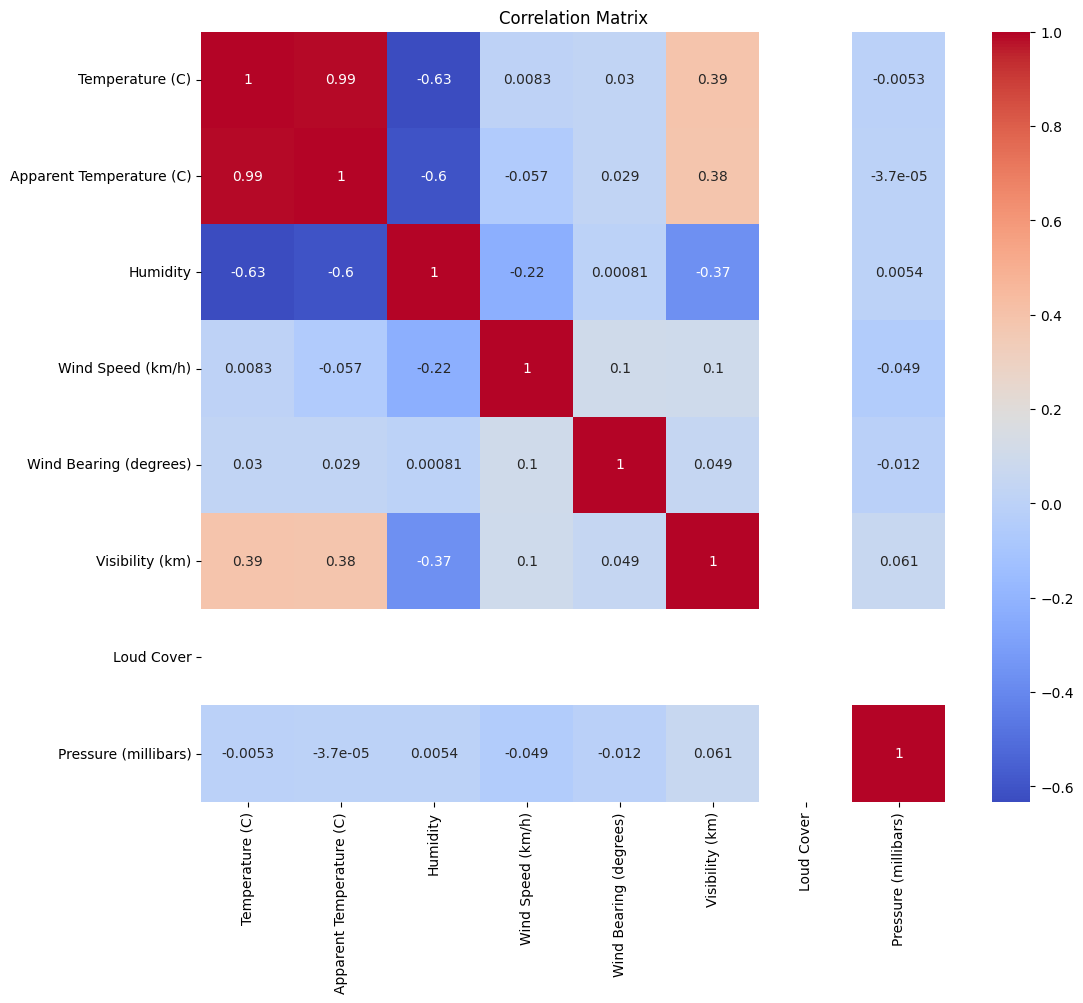

In [ ]:
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# F. Drop the Formatted Date and Apparent Temperature Columns
df_cleaned = df_cleaned.drop(columns=['Formatted Date', 'Apparent Temperature (C)'])

In [ ]:
# G. Perform one hot encoding to provide values for the categorical data
df_encoded = pd.get_dummies(df_cleaned, columns=['Summary', 'Precip Type', 'Daily Summary'])

In [ ]:
# H. Create training and test datasets
X = df_encoded.drop(columns=['Temperature (C)'])
y = df_encoded['Temperature (C)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# I. Apply Linear Regression to predict temperature
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# J. Evaluate the performance of the Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nLinear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")



Linear Regression Performance:
Mean Squared Error (MSE): 31.353501874845367
R-squared (R2 ): 0.656145135418698


In [ ]:
# K. Discuss the results
print("\nDiscussion:")
print("The Linear Regression model has been trained on the dataset and evaluated on the test set.")
print(f"The Mean Squared Error (MSE) is {mse}, indicating the average squared difference between the observed and predicted values.")
print(f"The R-squared value is {r2}, representing the proportion of the variance in the dependent variable that is predictable from the independent variables.")


Discussion:
The Linear Regression model has been trained on the dataset and evaluated on the test set.
The Mean Squared Error (MSE) is 31.353501874845367, indicating the average squared difference between the observed and predicted values.
The R-squared value is 0.656145135418698, representing the proportion of the variance in the dependent variable that is predictable from the independent variables.
